### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

### Read the data into dataframe

In [2]:
iris_df = pd.read_csv('./iris.csv')

### Data Exploration

In [3]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris_df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


### Check for NaNs, Outliers/Extremes, Unphysical Values

<AxesSubplot:xlabel='petal_length'>

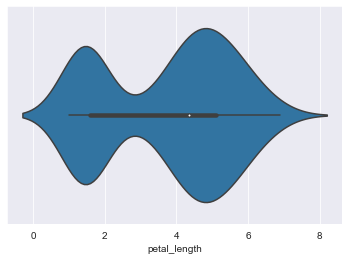

In [6]:
sns.violinplot(x='petal_length', data=iris_df)

In [7]:
for column in iris_df.columns:
    print(column)

sepal_length
sepal_width
petal_length
petal_width
species


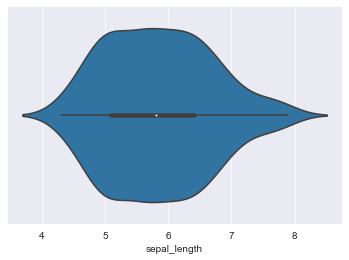

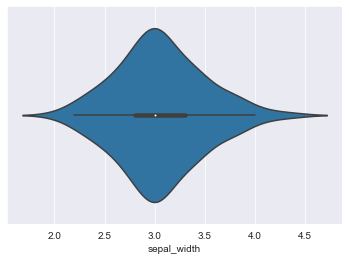

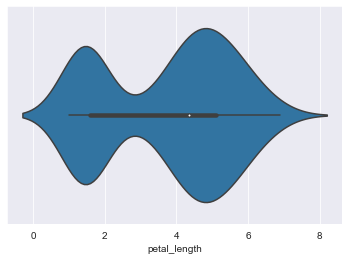

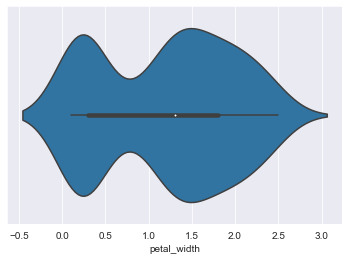

In [8]:
for column in iris_df.columns:
    if column == 'species':
        continue
    else:
        plt.figure()
        sns.violinplot(x=column, data=iris_df)

### Look for causal relationships/correlations

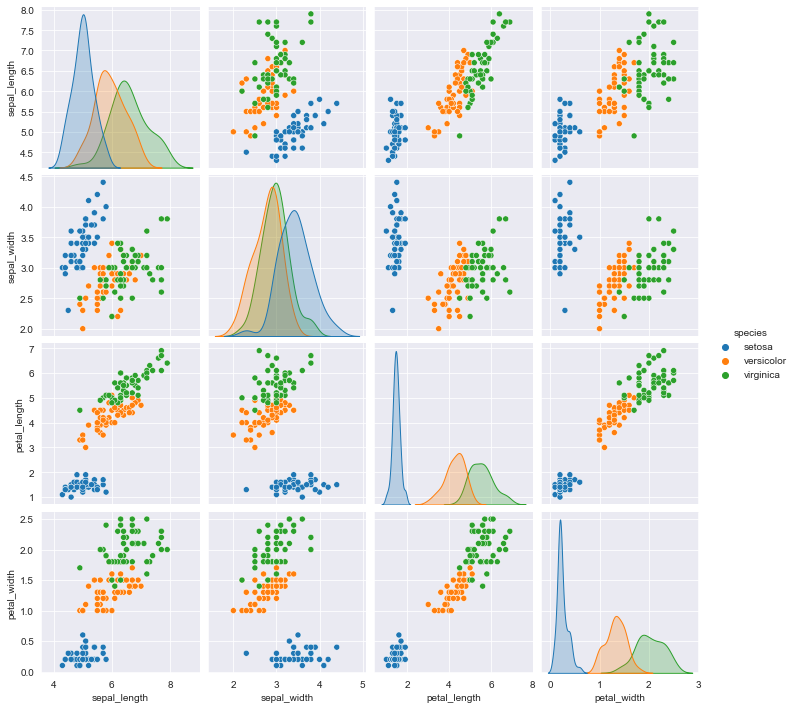

In [9]:
sns.pairplot(data=iris_df, hue='species')

In [10]:
corr = iris_df.corr()*100.

<AxesSubplot:>

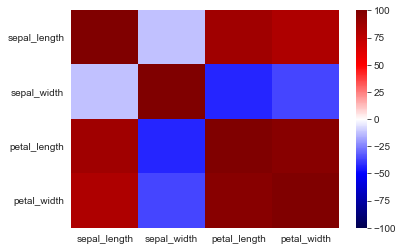

In [11]:
sns.heatmap(corr, vmin=-100, cmap='seismic')

### Assign features vs targets

In [12]:
X = iris_df.petal_width
y = iris_df.petal_length

In [13]:
X

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

In [14]:
X.min(), X.max()

(0.1, 2.5)

### Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_scaled = scaler.fit_transform(np.asarray(X.values).reshape(-1,1))

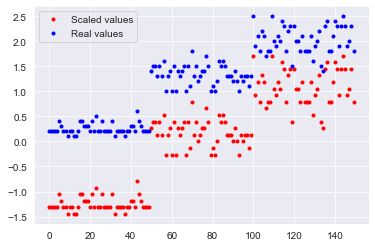

In [18]:
plt.figure()
plt.plot(X_scaled, 'r.', label='Scaled values')
plt.plot(X, 'b.', label='Real values')
plt.legend()

### Train - test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_test_split?

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)


In [25]:
np.shape(X_train), np.shape(X_test)

((120, 1), (30, 1))

### Model training

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf_model = RandomForestRegressor(min_samples_leaf=3, random_state=123)

In [47]:
rf_model

RandomForestRegressor(random_state=123)

In [48]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

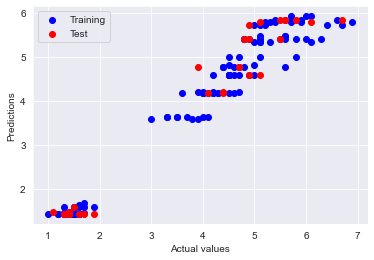

In [49]:
plt.scatter(y_train, rf_model.predict(X_train), color='b', label='Training')
plt.scatter(y_test, rf_model.predict(X_test), color='r', label='Test')
plt.ylabel('Predictions')
plt.xlabel('Actual values')
plt.legend()

### Error metrics

In [50]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [51]:
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [52]:
print('MSE on training set: ', mse(y_train, y_pred_train))
print('MSE on test set: ', mse(y_test, y_pred_test))

MSE on training set:  0.12163866745822478
MSE on test set:  0.1515299314002697


In [53]:
print('MAE on training set: ', mae(y_train, y_pred_train))
print('MAE on test set: ', mae(y_test, y_pred_test))

MAE on training set:  0.25798643578070596
MAE on test set:  0.28674948941095796


In [54]:
from sklearn.metrics import mean_absolute_percentage_error

ImportError: cannot import name 'mean_absolute_percentage_error' from 'sklearn.metrics' (/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/__init__.py)

In [56]:
from sklearn.tree import export_graphviz
from graphviz import Source #comment out if you can't install graphviz
from IPython.display import Image

In [57]:
# Export tree structure and save to Source object 
graph = Source( export_graphviz(rf_model[0], out_file=None) ) #comment out if you can't install graphviz

In [58]:
tree_png = graph.pipe(format='png') #comment out if you can't install graphviz

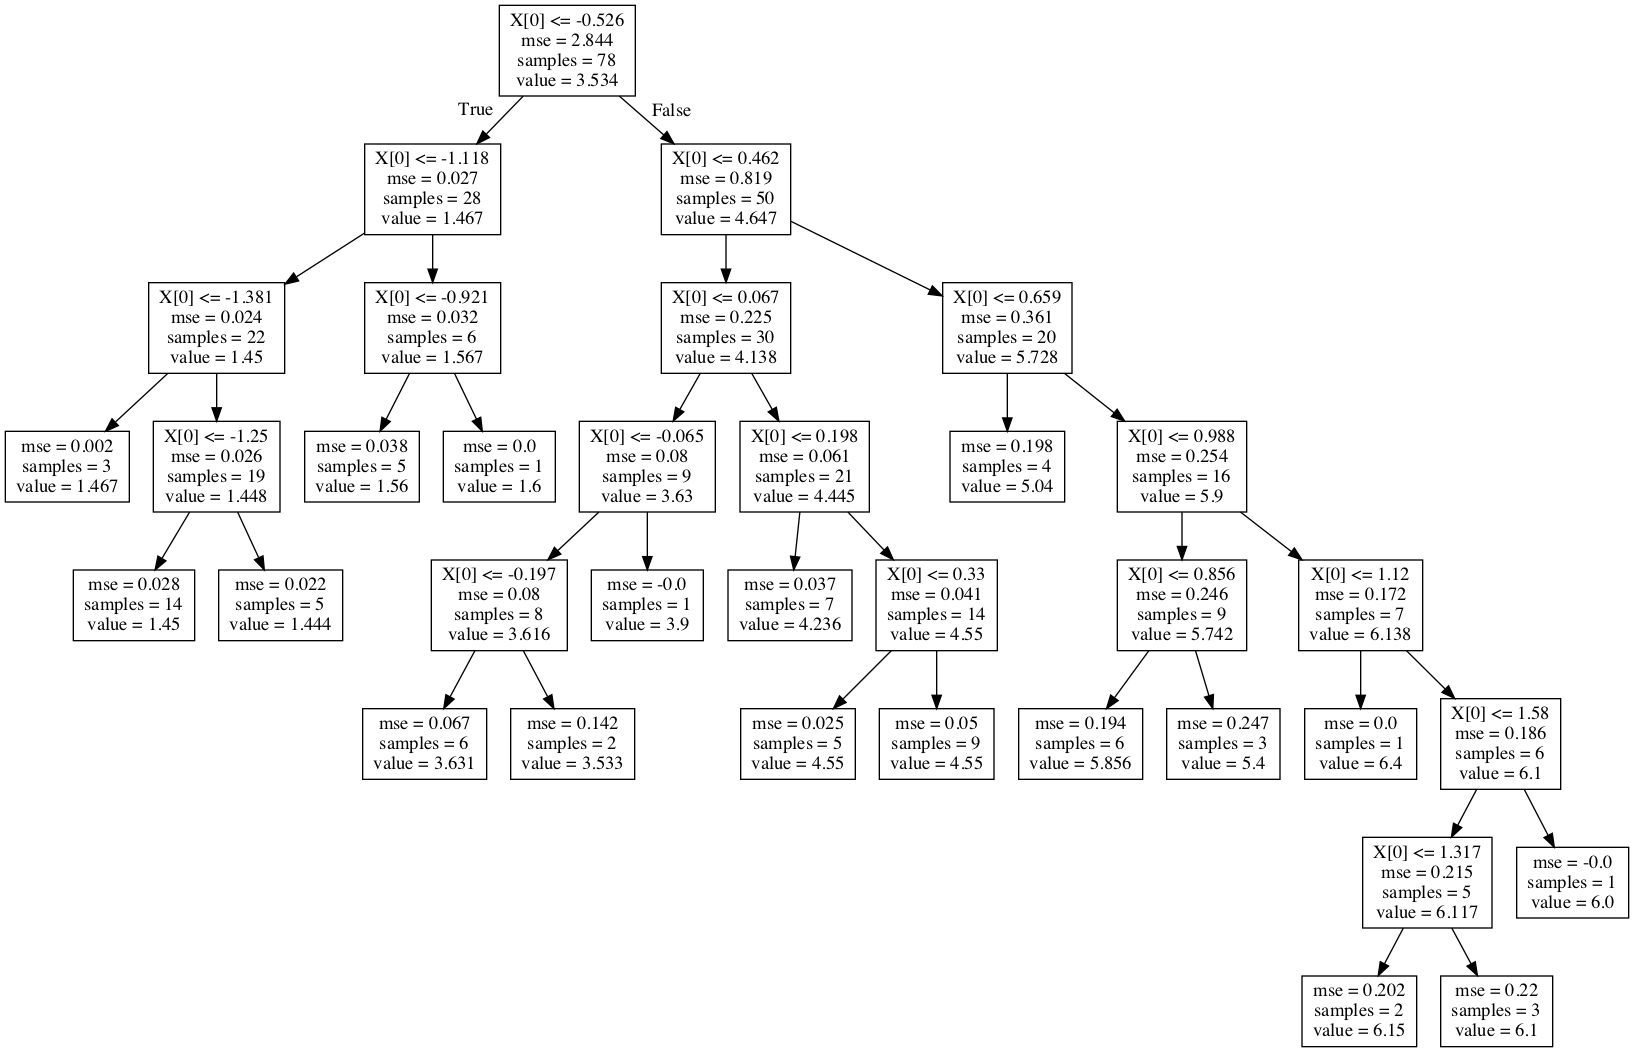

In [59]:
Image(tree_png) #comment out if you can't install graphviz

In [ ]:
rf_model.